In [61]:
import pandas as pd
import ClassificatorUtils as cls
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.svm import SVC
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler



In [29]:

csv_path = '../data/ACC.csv'
df_acc = pd.read_csv(csv_path)
df_acc = df_acc.drop([ 'ID', 'scenario', 'seed', 'Controller', 'numHumanCars', 'BeaconIntervalPlat', 'BeaconIntervalHuman', 'PacketSize', 'waitTime', 'DENMInterval'], axis=1)
df_acc = df_acc.dropna()
df_acc = df_acc.drop_duplicates()

csv_path = '../data/CACC_PLOEG.csv'
df = pd.read_csv(csv_path)
index_cacc = df.index[df['Controller'] != "CACC"].tolist()
df_cacc = df.drop(index_cacc)
index_ploeg = df.index[df['Controller'] != "PLOEG"].tolist()
df_ploeg = df.drop(index_ploeg)

df_cacc_ploeg = df.drop([ 'ID', 'scenario', 'seed'], axis=1)
df_cacc_ploeg = df_cacc_ploeg.dropna()
df_cacc_ploeg = df_cacc_ploeg.drop_duplicates()

df_cacc = df_cacc.drop([ 'ID', 'scenario', 'seed', 'Controller'], axis=1)
df_cacc = df_cacc.dropna()
df_cacc = df_cacc.drop_duplicates()

df_ploeg = df_ploeg.drop([ 'ID', 'scenario', 'seed', 'Controller'], axis=1)
df_ploeg = df_ploeg.dropna()
df_ploeg = df_ploeg.drop_duplicates()

f_names_acc = ['numPlatCars', 'spdLeader', 'DecelerationRate', 'Ctr_Param(Ploegh||Spacing)']
X_acc = df_acc[f_names_acc]
y_acc = df_acc['Collision']

f_names = ['numPlatCars', 'numHumanCars', 'spdLeader', 'BeaconIntervalPlat', 'BeaconIntervalHuman', 'DENMInterval', 'DecelerationRate', 'PacketSize', 'Ctr_Param(Ploegh||Spacing)', 'waitTime']
X_cacc = df_cacc[f_names]
y_cacc = df_cacc['Collision']

X_ploeg = df_ploeg[f_names]
y_ploeg = df_ploeg['Collision']

f_names_all = ['Controller', 'numPlatCars', 'numHumanCars', 'spdLeader', 'BeaconIntervalPlat', 'BeaconIntervalHuman', 'DENMInterval', 'DecelerationRate', 'PacketSize', 'Ctr_Param(Ploegh||Spacing)', 'waitTime']
X_cacc_ploeg = df_cacc_ploeg[f_names_all]
y_cacc_ploeg = df_cacc_ploeg['Collision']


In [48]:
def test_dec_tree_ploeg(X_train, y_train, X_test, y_test, X_train_std, X_test_std):
    leafs = 2
    column_names = ['Algorithm', 'Standarised', 'AccTrain', 'Acc', 'Prec', 'Recall', 'TN', 'FP', 'FN', 'TP', 'TimeMed', 'TimeMax', 'TimeMin', 'max_leaf_node']
    dt = DecisionTreeClassifier(class_weight="balanced", max_leaf_nodes=leafs).fit(X_train, y_train)
    print(cls.algor(dt, X_train_std, y_train, X_test_std, y_test, 'DecisionTree', True, column_names, [leafs]))
    return dt

def test_dec_tree_cacc(X_train, y_train, X_test, y_test, X_train_std, X_test_std):
    leafs = 8#5
    column_names = ['Algorithm', 'Standarised', 'AccTrain', 'Acc', 'Prec', 'Recall', 'TN', 'FP', 'FN', 'TP', 'TimeMed', 'TimeMax', 'TimeMin', 'max_leaf_node']
    dt = DecisionTreeClassifier(class_weight="balanced", max_leaf_nodes=leafs).fit(X_train, y_train)
    print(cls.algor(dt, X_train_std, y_train, X_test_std, y_test, 'DecisionTree', True, column_names, [leafs]))
    return dt

def test_dec_tree_acc(X_train, y_train, X_test, y_test, X_train_std, X_test_std):
    leafs = 45
    column_names = ['Algorithm', 'Standarised', 'AccTrain', 'Acc', 'Prec', 'Recall', 'TN', 'FP', 'FN', 'TP', 'TimeMed', 'TimeMax', 'TimeMin', 'max_leaf_node']
    dt = DecisionTreeClassifier(class_weight="balanced", max_leaf_nodes=leafs).fit(X_train, y_train)
    print(cls.algor(dt, X_train_std, y_train, X_test_std, y_test, 'DecisionTree', True, column_names, [leafs]))
    return dt

# CART Classification Feature Importance (DT)

      Algorithm  Standarised  AccTrain       Acc      Prec    Recall    TN  \
0  DecisionTree         True  0.974965  0.966639  0.785714  0.993056  1016   

   FP  FN   TP   TimeMed   TimeMax   TimeMin  max_leaf_node  
0  39   1  143  0.000099  0.001116  0.000054             45  
Feature: numPlatCars, Score: 0.06927
Feature: spdLeader, Score: 0.07528
Feature: DecelerationRate, Score: 0.51494
Feature: Ctr_Param(Ploegh||Spacing), Score: 0.34051


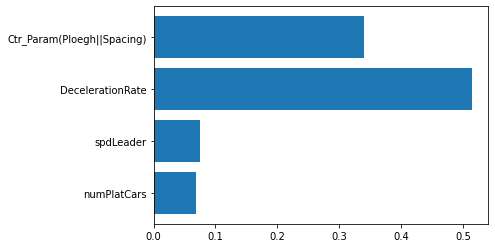

In [67]:
dt = cls.test_algorithms(X_acc, y_acc, test_dec_tree_acc)

importance = dt.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %s, Score: %.5f' % (f_names_acc[i],v))
# plot feature importance
plt.barh(f_names_acc, importance)
plt.show()

text_representation = tree.export_text(dt, feature_names=f_names_acc)
with open("../results/DT_ACC.log", "w") as fout:
    fout.write(text_representation)


      Algorithm  Standarised  AccTrain       Acc      Prec    Recall   TN  FP  \
0  DecisionTree         True  0.821285  0.844311  0.410256  0.842105  125  23   

   FN  TP   TimeMed   TimeMax   TimeMin  max_leaf_node  
0   3  16  0.000082  0.000641  0.000049              8  
Feature: numPlatCars, Score: 0.00000
Feature: numHumanCars, Score: 0.12053
Feature: spdLeader, Score: 0.68284
Feature: BeaconIntervalPlat, Score: 0.00000
Feature: BeaconIntervalHuman, Score: 0.00000
Feature: DENMInterval, Score: 0.09568
Feature: DecelerationRate, Score: 0.00000
Feature: PacketSize, Score: 0.00000
Feature: Ctr_Param(Ploegh||Spacing), Score: 0.00000
Feature: waitTime, Score: 0.10095


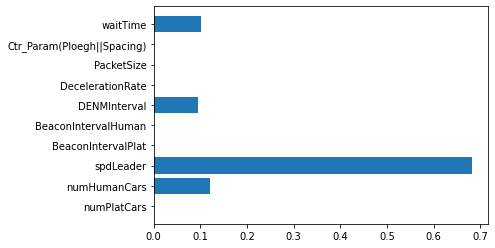

In [68]:
dt = cls.test_algorithms(X_cacc, y_cacc, test_dec_tree_cacc)

importance = dt.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %s, Score: %.5f' % (f_names[i],v))
# plot feature importance
plt.barh(f_names, importance)
plt.show()

text_representation = tree.export_text(dt, feature_names=f_names)
with open("../results/DT_CACC.log", "w") as fout:
    fout.write(text_representation)

      Algorithm  Standarised  AccTrain      Acc      Prec    Recall  TN  FP  \
0  DecisionTree         True    0.9325  0.91791  0.868421  0.846154  90   5   

   FN  TP   TimeMed  TimeMax   TimeMin  max_leaf_node  
0   6  33  0.000096  0.00128  0.000052              2  
Feature: numPlatCars, Score: 0.00000
Feature: numHumanCars, Score: 0.00000
Feature: spdLeader, Score: 0.00000
Feature: BeaconIntervalPlat, Score: 0.00000
Feature: BeaconIntervalHuman, Score: 1.00000
Feature: DENMInterval, Score: 0.00000
Feature: DecelerationRate, Score: 0.00000
Feature: PacketSize, Score: 0.00000
Feature: Ctr_Param(Ploegh||Spacing), Score: 0.00000
Feature: waitTime, Score: 0.00000


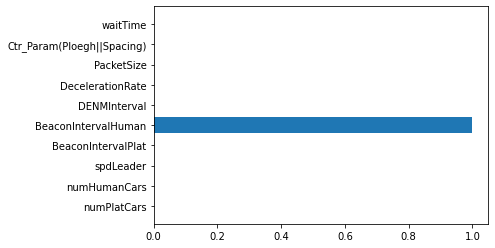

In [69]:
dt = cls.test_algorithms(X_ploeg, y_ploeg, test_dec_tree_ploeg)

importance = dt.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %s, Score: %.5f' % (f_names[i],v))
# plot feature importance
plt.barh(f_names, importance)
plt.show()

text_representation = tree.export_text(dt, feature_names=f_names)
with open("../results/DT_PLOEG.log", "w") as fout:
    fout.write(text_representation)

# Permutation importance for feature evaluation (SVC)

In [70]:
def test_svm(X_train, y_train, X_test, y_test, X_train_std, X_test_std):
    column_names = ['Algorithm', 'Standarised', 'AccTrain', 'Acc', 'Prec', 'Recall', 'TN', 'FP', 'FN', 'TP', 'TimeMed', 'TimeMax', 'TimeMin']
    svm = SVC(class_weight="balanced")
    print(cls.algor(svm, X_train_std, y_train, X_test_std, y_test, 'SVC', True, column_names))
    return svm

def f_importances(coef, names):
    imp = coef
    imp,names = zip(*sorted(zip(imp,names)))
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.show()

def permutation(X, y, svm):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
    nan_elems = y_test.isnull()
    y_test = y_test[~nan_elems]
    X_test = X_test[~nan_elems]
    y_train = y_train.astype(bool)
    y_test = y_test.astype(bool)

    scaler = StandardScaler()
    X_train_std = scaler.fit_transform(X_train)
    X_test_std = scaler.transform(X_test)

    result = permutation_importance(svm, X_test_std, y_test)
 
    return result

  Algorithm  Standarised  AccTrain       Acc      Prec    Recall   TN  FP  FN  \
0       SVC         True   0.92573  0.918265  0.596639  0.986111  959  96   2   

    TP   TimeMed   TimeMax   TimeMin  
0  142  0.000332  0.003226  0.000162  
[0.0148457  0.02268557 0.13327773 0.12076731]


Text(0.5, 0, 'Permutation Importance')

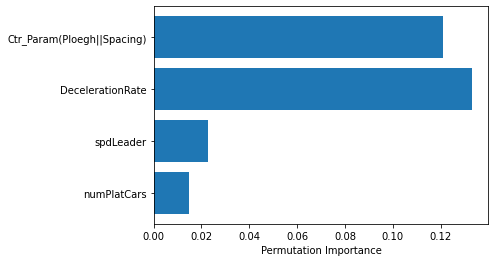

In [77]:
svm = cls.test_algorithms(X_acc, y_acc, test_svm)

perm_importance = permutation(X_acc, y_acc, svm)

sorted_idx = perm_importance.importances_mean.argsort()
print(perm_importance.importances_mean)
plt.barh(f_names_acc, perm_importance.importances_mean)
plt.xlabel("Permutation Importance")

  Algorithm  Standarised  AccTrain       Acc     Prec    Recall   TN  FP  FN  \
0       SVC         True  0.875502  0.850299  0.40625  0.684211  129  19   6   

   TP   TimeMed   TimeMax   TimeMin  
0  13  0.000237  0.001887  0.000118  
[-1.07784431e-02  1.07784431e-02  1.28143713e-01 -5.98802395e-03
 -2.39520958e-03 -5.98802395e-03 -9.58083832e-03  3.59281437e-03
  4.44089210e-17 -1.19760479e-03]


Text(0.5, 0, 'Permutation Importance')

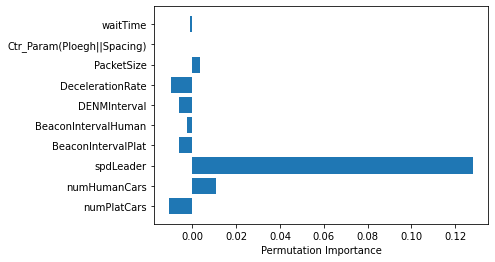

In [78]:
svm = cls.test_algorithms(X_cacc, y_cacc, test_svm)

perm_importance = permutation(X_cacc, y_cacc, svm)

sorted_idx = perm_importance.importances_mean.argsort()
print(perm_importance.importances_mean)
plt.barh(f_names, perm_importance.importances_mean)
plt.xlabel("Permutation Importance")

  Algorithm  Standarised  AccTrain       Acc      Prec    Recall  TN  FP  FN  \
0       SVC         True     0.935  0.925373  0.871795  0.871795  90   5   5   

   TP   TimeMed   TimeMax   TimeMin  
0  34  0.000223  0.001848  0.000116  
[0.00597015 0.00447761 0.00746269 0.00149254 0.16119403 0.00149254
 0.00149254 0.00149254 0.00298507 0.        ]


Text(0.5, 0, 'Permutation Importance')

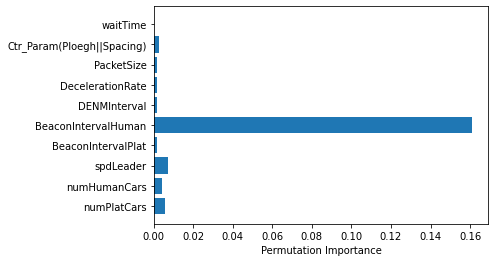

In [76]:
svm = cls.test_algorithms(X_ploeg, y_ploeg, test_svm)

perm_importance = permutation(X_ploeg, y_ploeg, svm)

sorted_idx = perm_importance.importances_mean.argsort()
print(perm_importance.importances_mean)
plt.barh(f_names, perm_importance.importances_mean)
plt.xlabel("Permutation Importance")